In [48]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
COLORS = [
    "#ffd7b3", # orange
    "#cce1e4", # green
    "#d9d9d9", # grey
    ]

PROPOSED_MFE_SUFFIXES = [
            "psi_",
            "overlap_",
            "omv_pth",
            "dc_accuracy",
            "dc_drift_flag",
            "_ks_statistic",
            "_ks_pvalue",
            "sqsi_drift_flag",
            "distance_class_",
            "u_detect_drift_flag",
            "predict",
            "last",
        ]

FINAL_FEATURE_FRACTION = {'powersupply': 50, 'airlines': 65, 'electricity': 15, 'rialto': 10}

In [50]:

TYPE_DICT = {"with_drift": "proposed_mtl", "without_drift": "original_mtl"}

def get_bar_color(row):
    if any(suffix in row["feature"] for suffix in PROPOSED_MFE_SUFFIXES):
        return COLORS[0]
    return COLORS[1]

def _load_data(base_model: str="RandomForestClassifier", dataset: str="electricity", feature_fraction: int=100):
    filename = f"results_importances/base_model: {base_model} - dataset: {dataset} - select_k_features: {feature_fraction}%.json"
    with open(filename) as json_file:
        data = json.load(json_file)
    return data

def _get_mean_importances(data: dict):
    final_df = pd.DataFrame(columns=["feature", "importance", "type", "meta_label"])
    for metric, value in data.items():
        for drift_flag in value.keys():
            importances_df = pd.DataFrame()
            importances_df["importance"] = pd.DataFrame(data[metric][drift_flag]).mean()
            importances_df["type"] = TYPE_DICT[drift_flag]
            importances_df["meta_label"] = metric
            importances_df = importances_df.reset_index().rename(columns={"index": "feature"})
            final_df = pd.concat([final_df, importances_df])
    return final_df

def _plot_results(data: dict, final_df: pd.DataFrame, n_feat_to_plot: int=20, figsize=(25, 35), suptitle=""):
    metrics = list(data.keys())
    drift_flags = list(data['kappa'].keys())
    plt.figure(figsize=figsize)
    plt.suptitle(suptitle, fontsize=25)
    final_df["color"] = final_df.apply(get_bar_color, axis=1)

    for metric_idx, metric in enumerate(metrics):
        for drift_idx, drift_flag in enumerate(drift_flags):
            plt.subplot(len(metrics), len(drift_flags), metric_idx * 2 + drift_idx + 1)
            plt.title(f"{metric} - {TYPE_DICT[drift_flag]}")
            plot_df = final_df[(final_df["type"] == TYPE_DICT[drift_flag]) & (final_df["meta_label"] == metric)]
            plot_df = plot_df.sort_values(by=["importance"]).tail(n_feat_to_plot)
            plt.barh(plot_df["feature"], plot_df["importance"], color=plot_df["color"])
            plt.tight_layout()
    plt.subplots_adjust(top=0.95)

def run(base_model: str="RandomForestClassifier", dataset: str="electricity", n_feat_to_plot: int=20, figsize: tuple=(25, 35), feature_fraction: int=100):
    data = _load_data(base_model, dataset, feature_fraction)
    data.pop("auc", None)
    imp_df = _get_mean_importances(data)
    _plot_results(
        data=data,
        final_df=imp_df,
        n_feat_to_plot=n_feat_to_plot,
        figsize=figsize,
        suptitle=f"base_model: {base_model} - dataset: {dataset}")

# Base models

## Decision tree

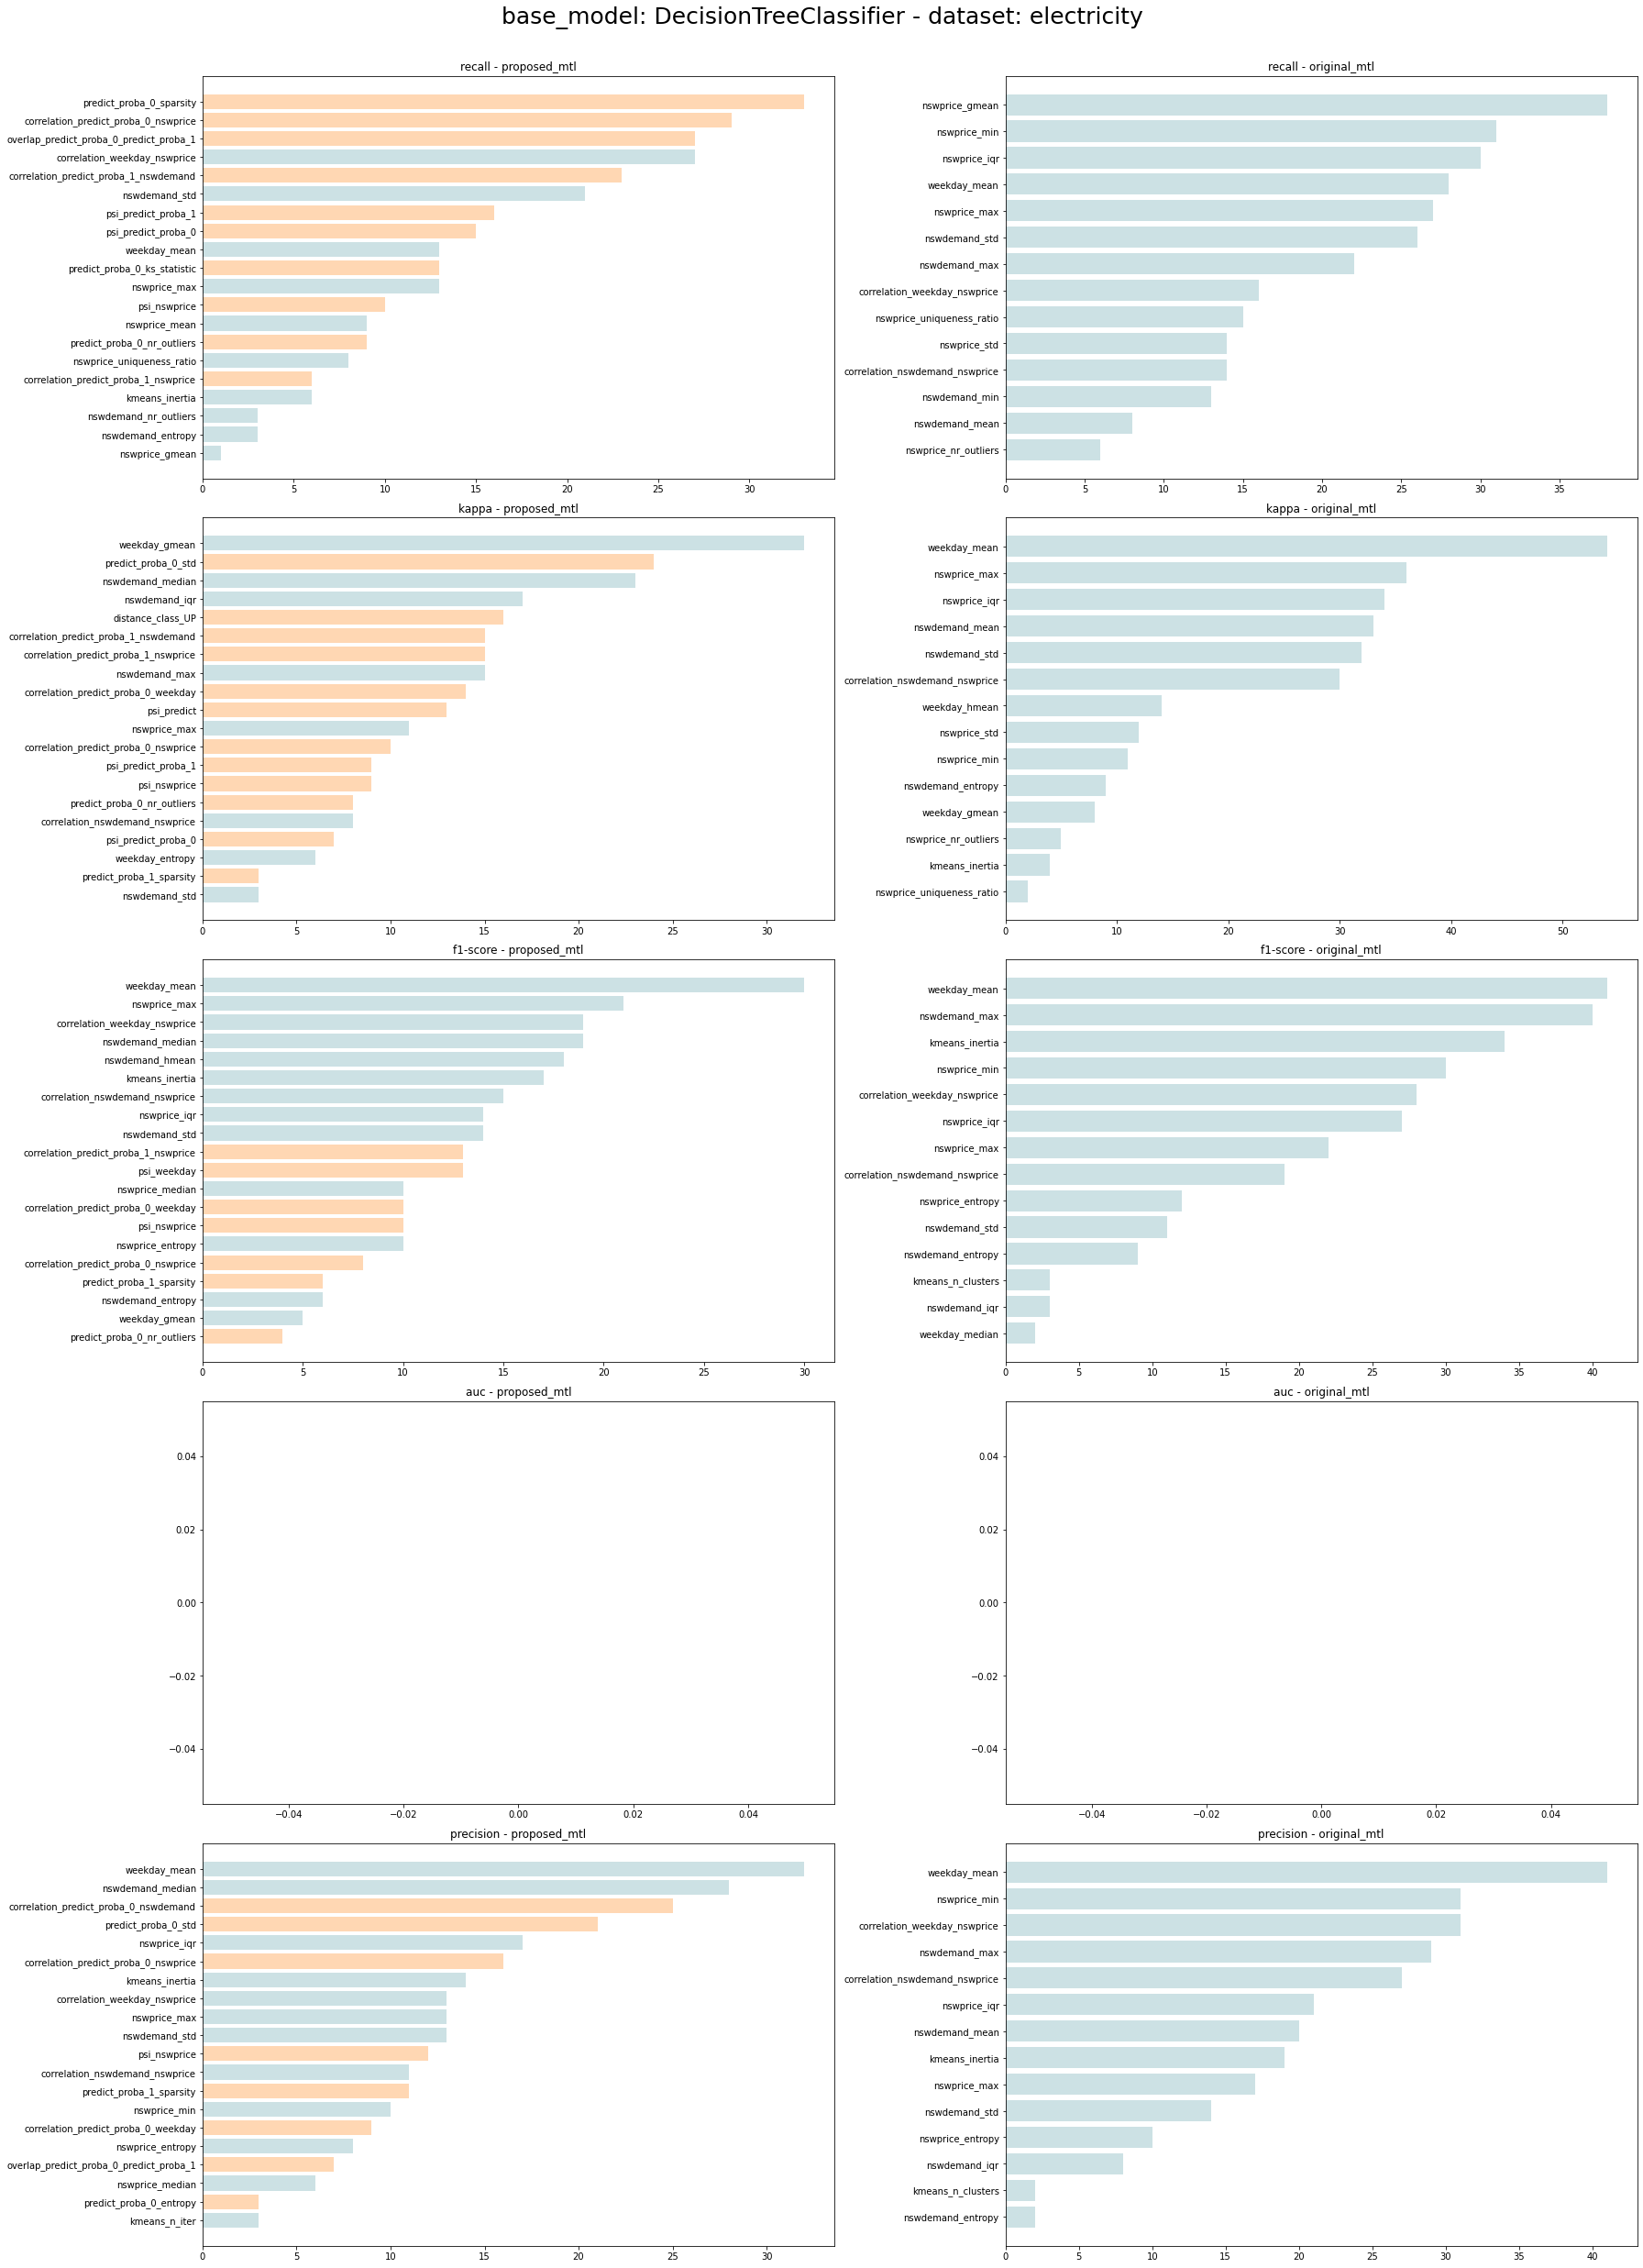

In [51]:
run(base_model="DecisionTreeClassifier", dataset="electricity", feature_fraction=FINAL_FEATURE_FRACTION["electricity"])

## SVM

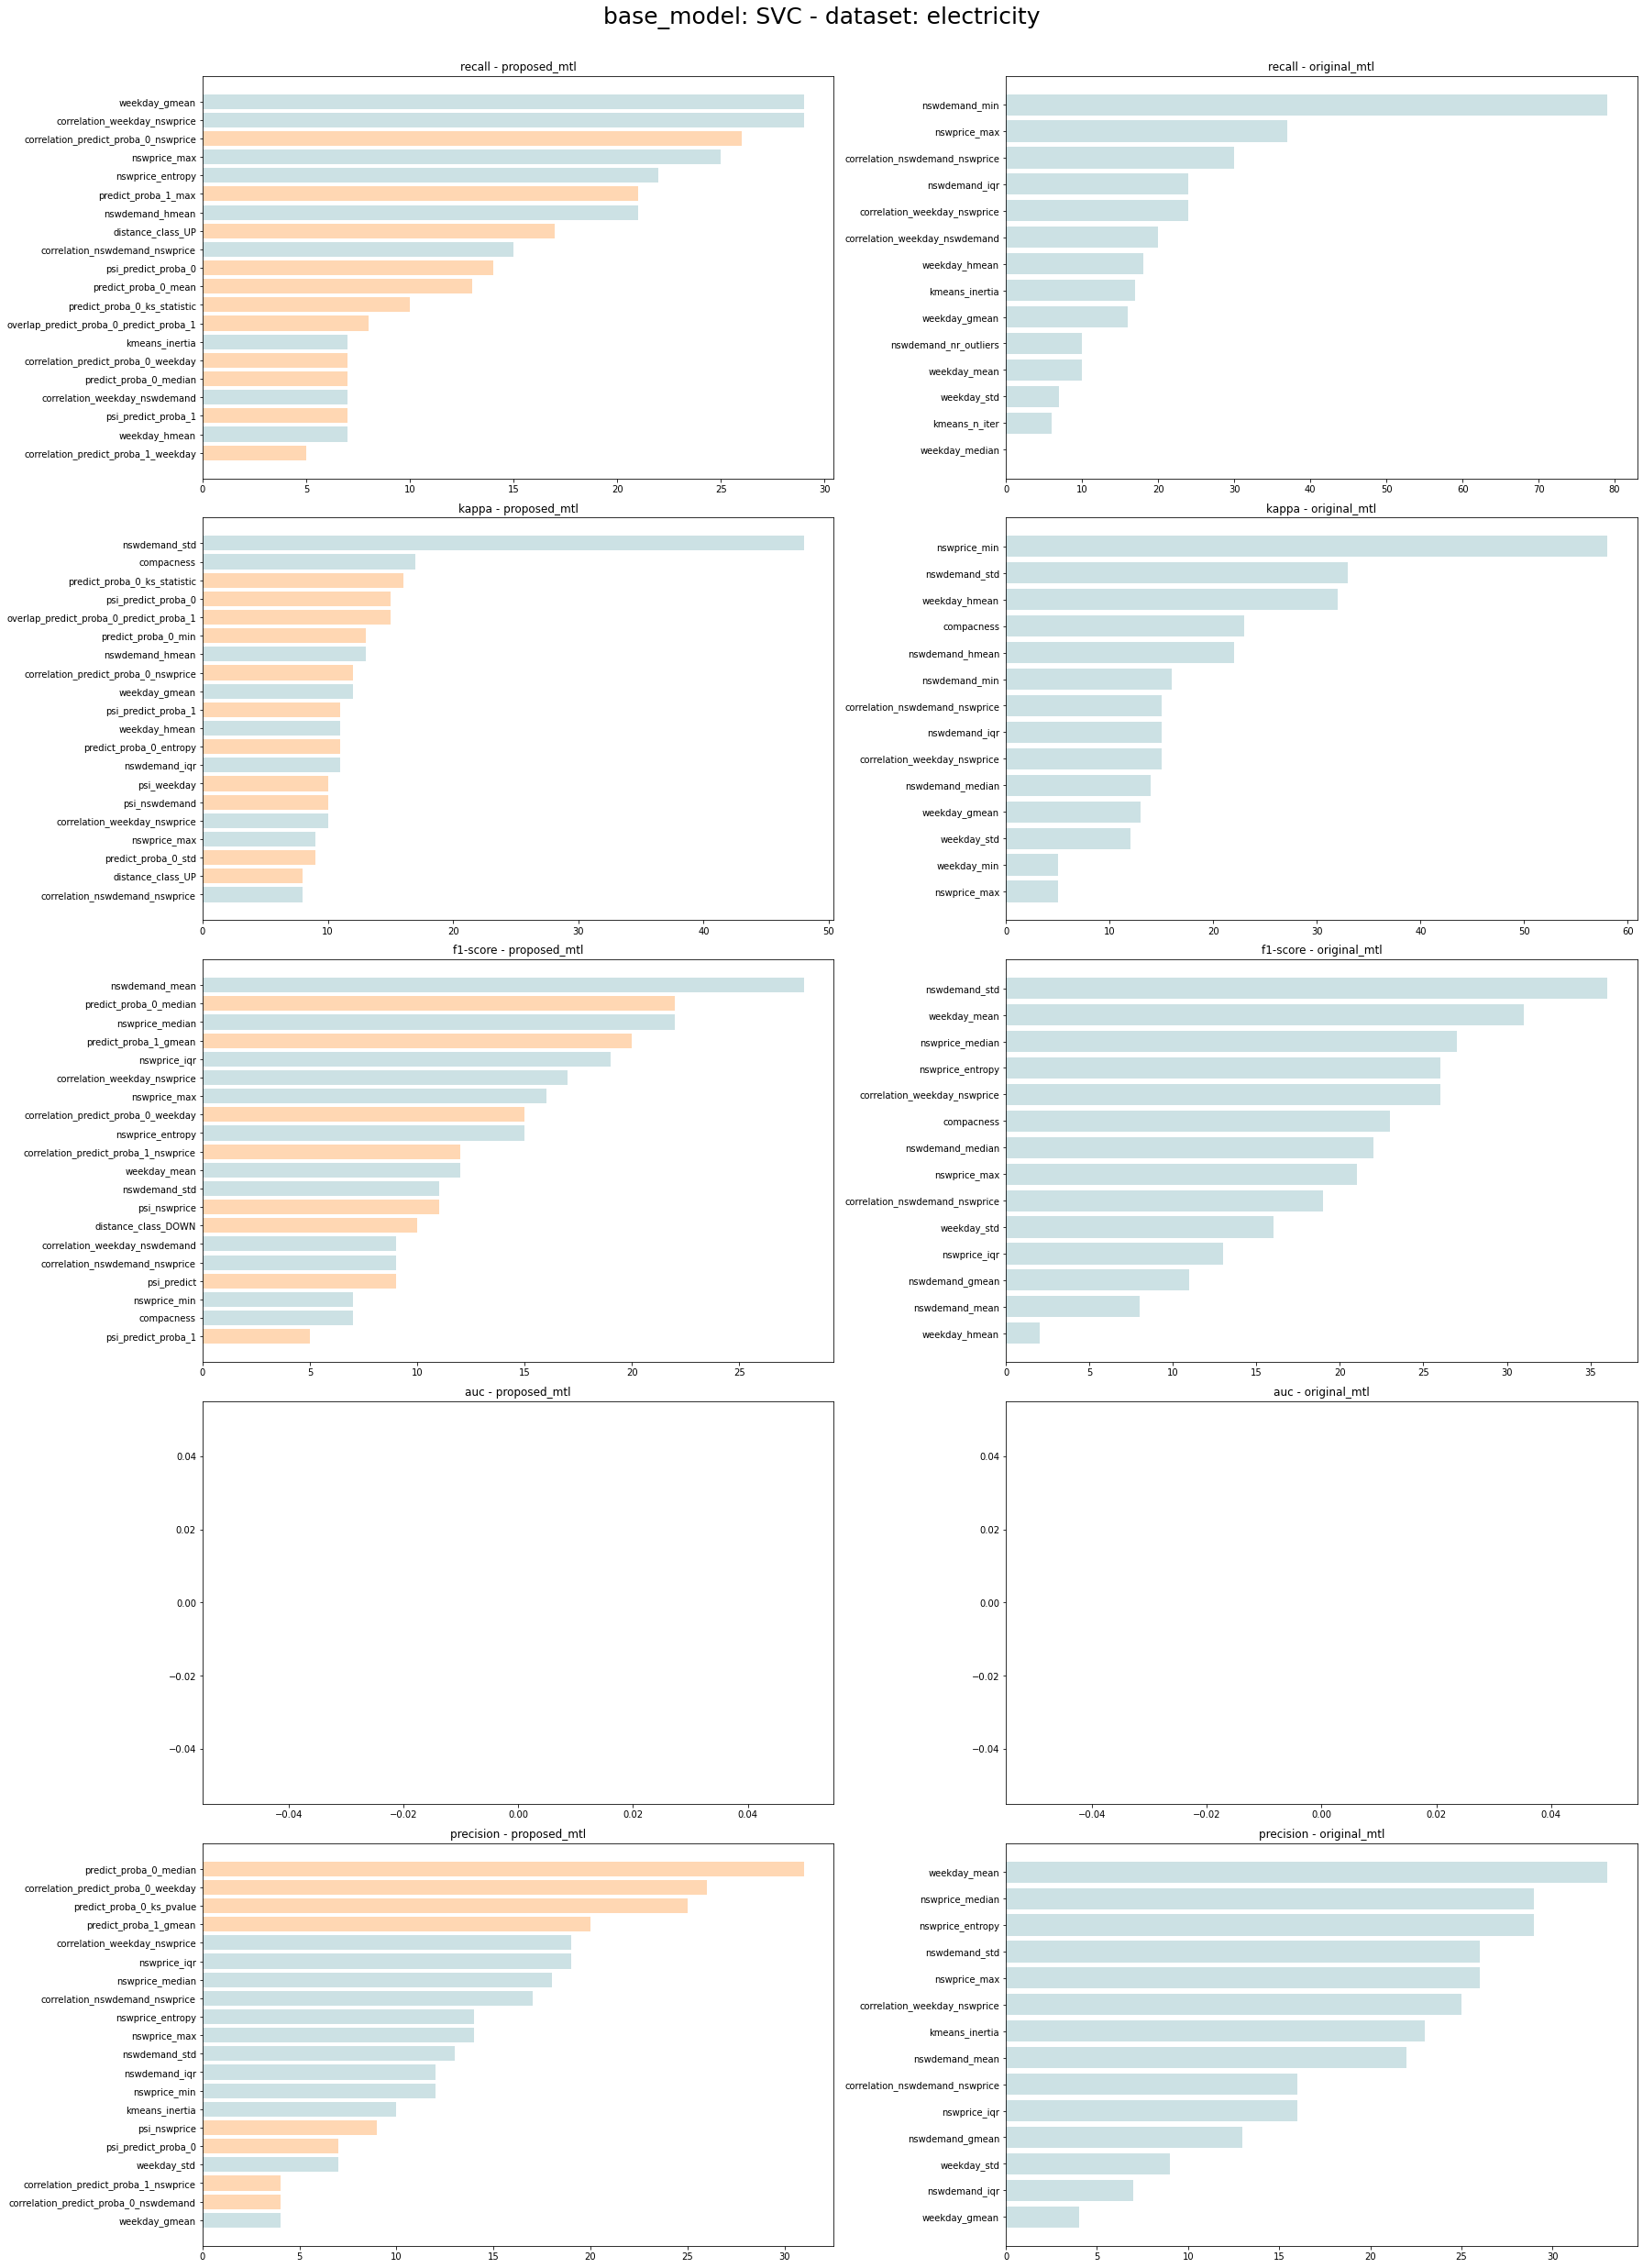

In [52]:
run(base_model="SVC", dataset="electricity", feature_fraction=FINAL_FEATURE_FRACTION["electricity"])

## LogisticRegression

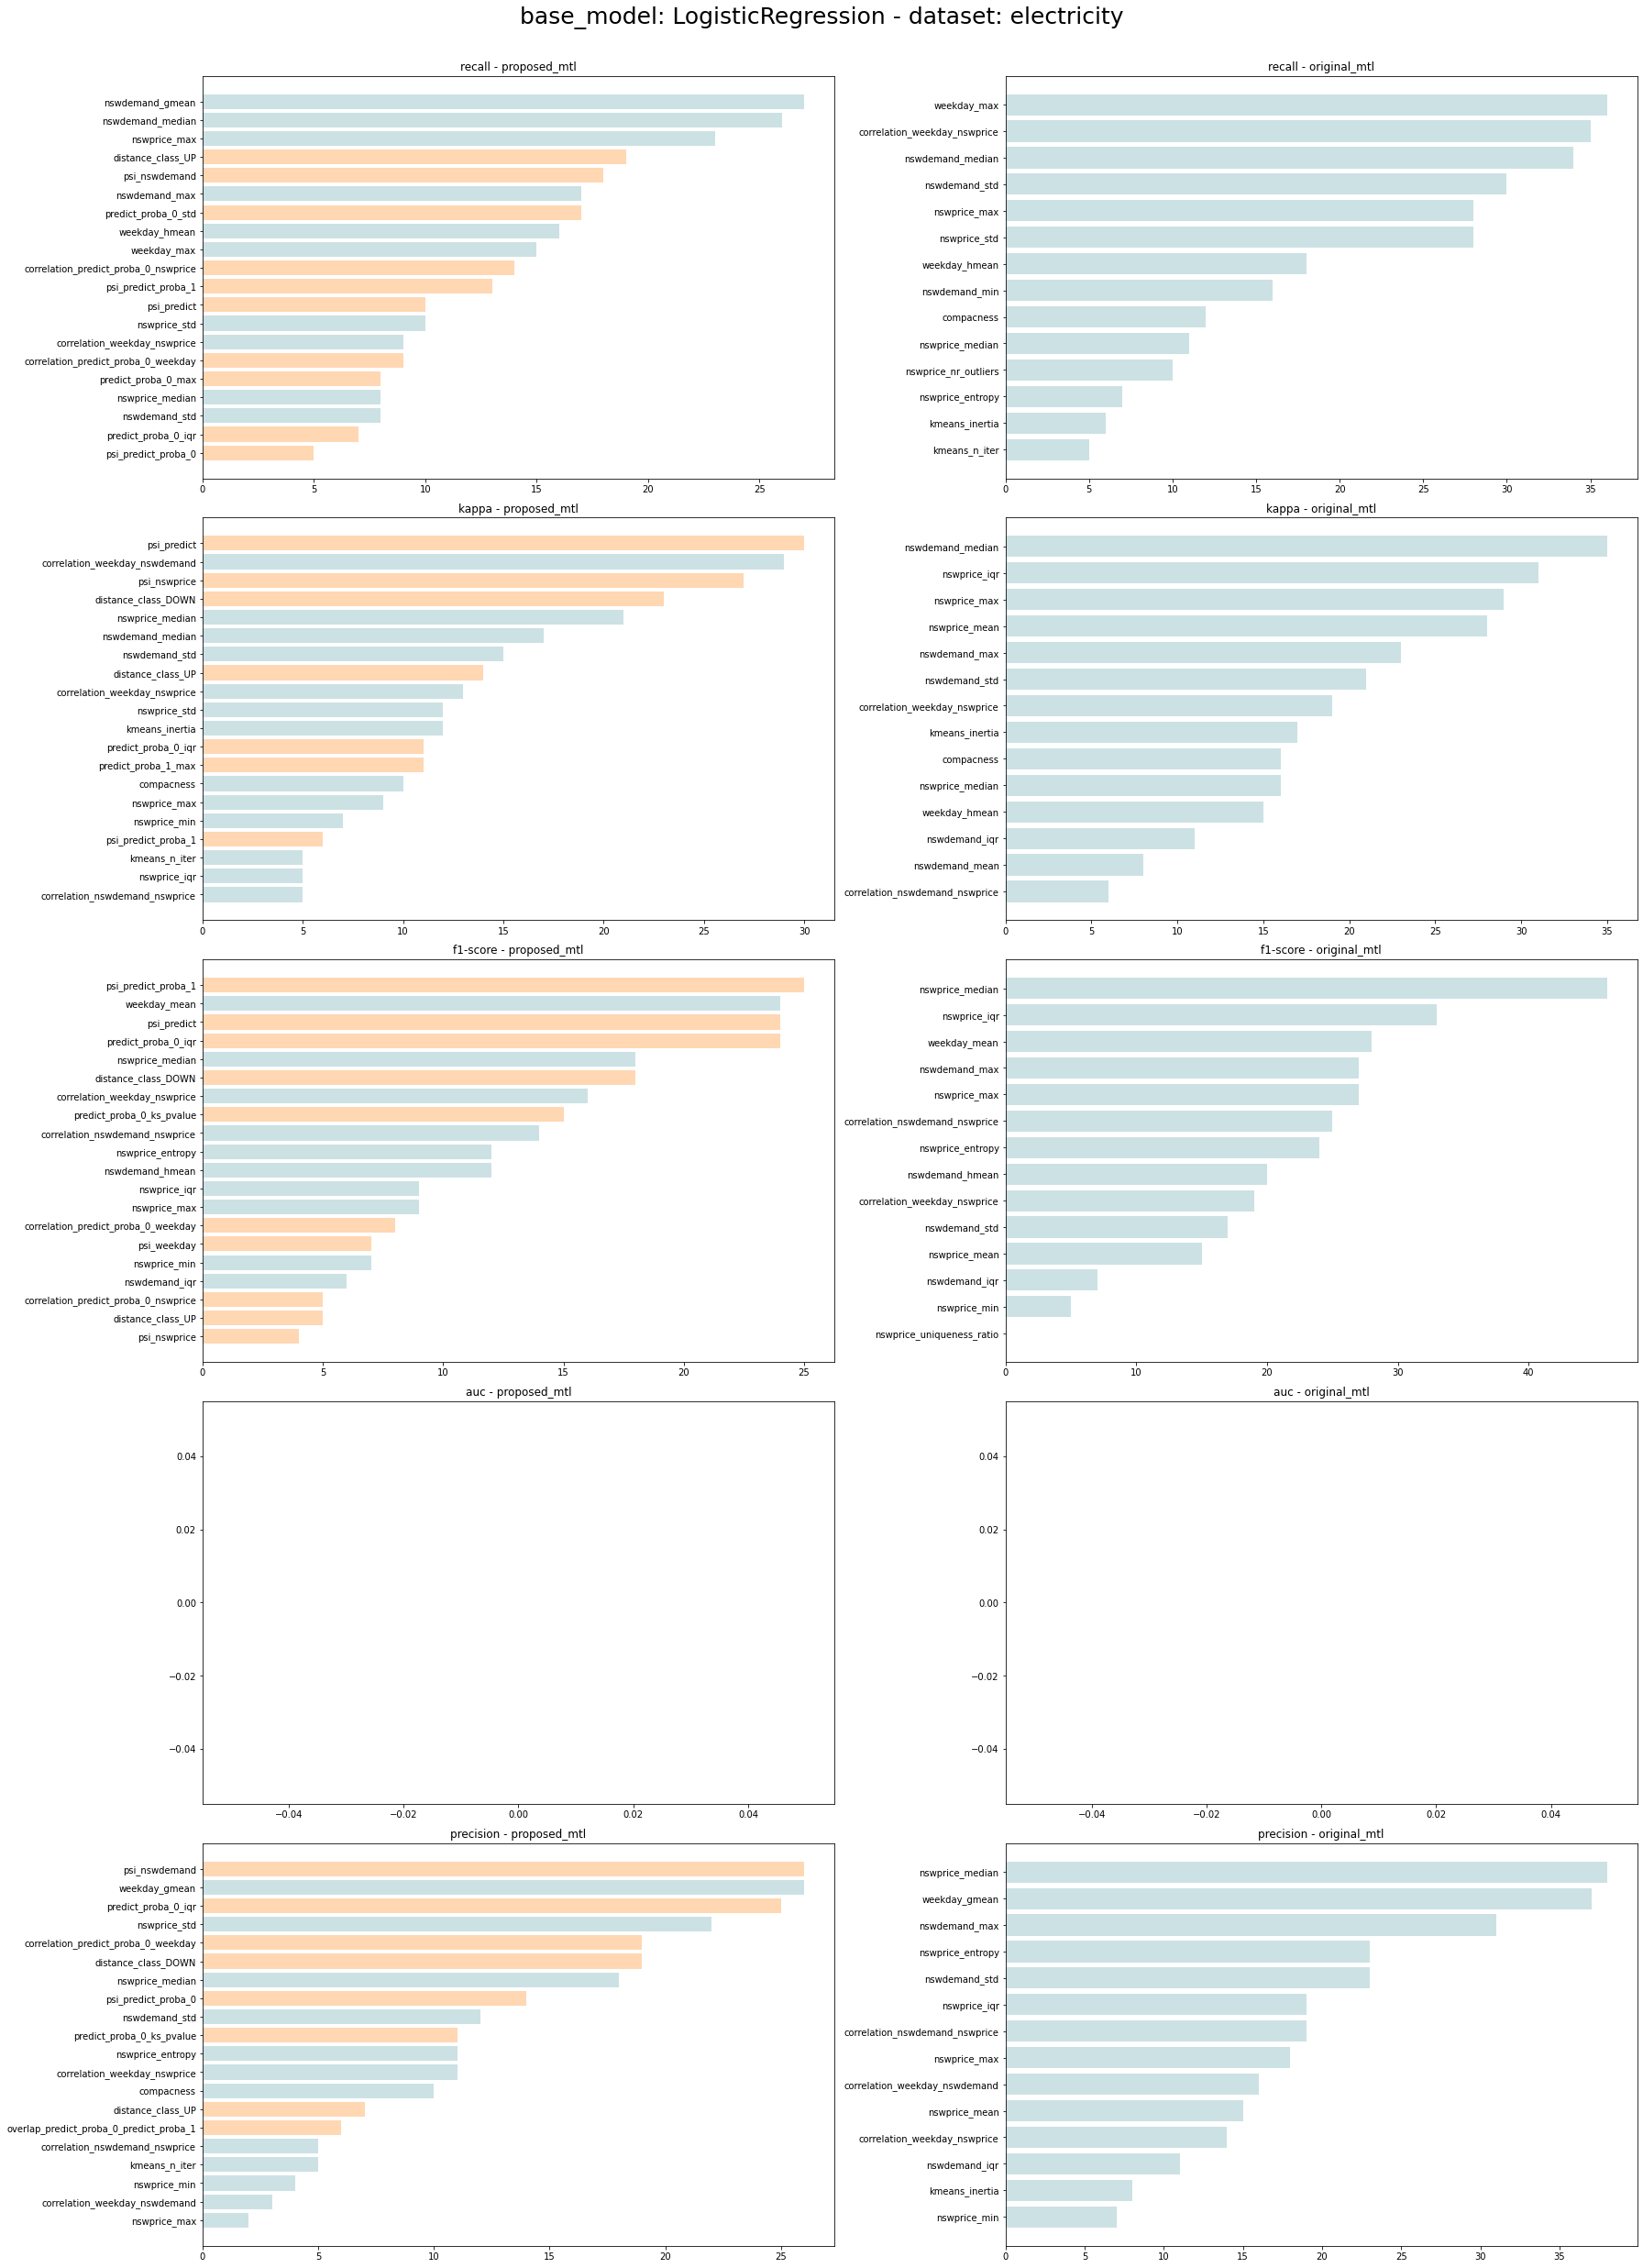

In [53]:
run(base_model="LogisticRegression", dataset="electricity", feature_fraction=FINAL_FEATURE_FRACTION["electricity"])

# Datasets

# Electricity

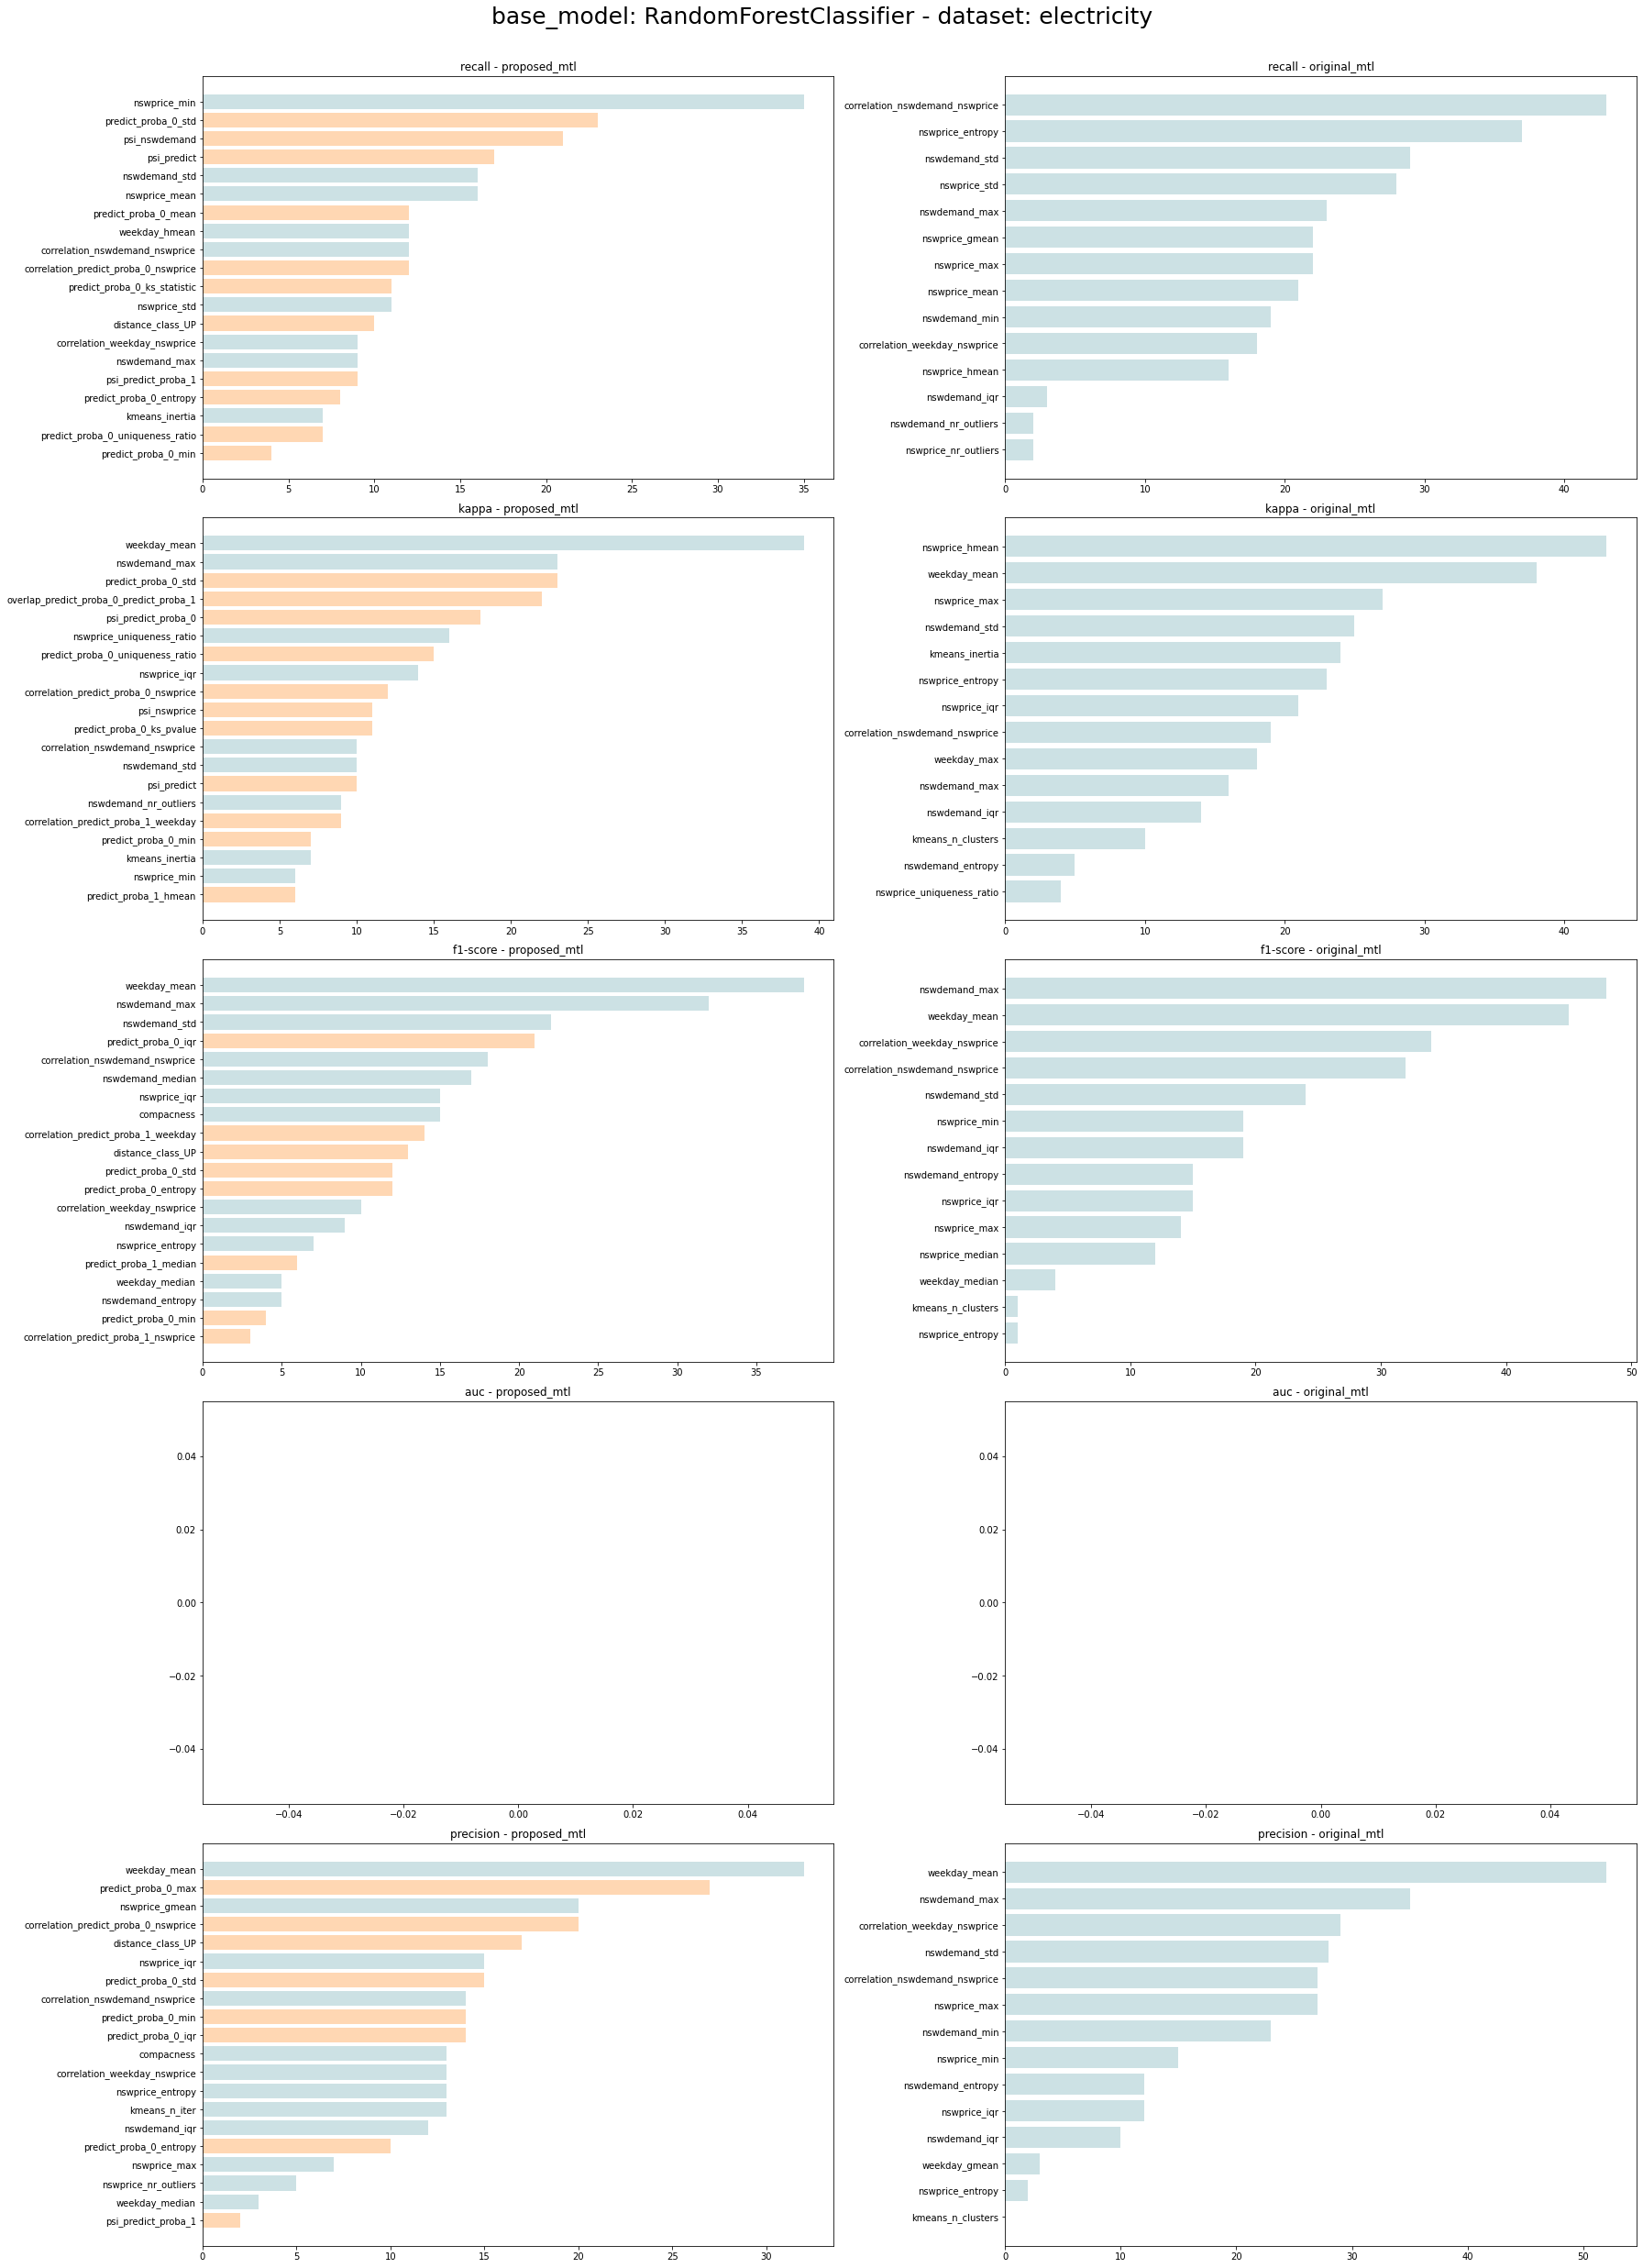

In [54]:
run(base_model="RandomForestClassifier", dataset="electricity", feature_fraction=FINAL_FEATURE_FRACTION["electricity"])

# Airlines

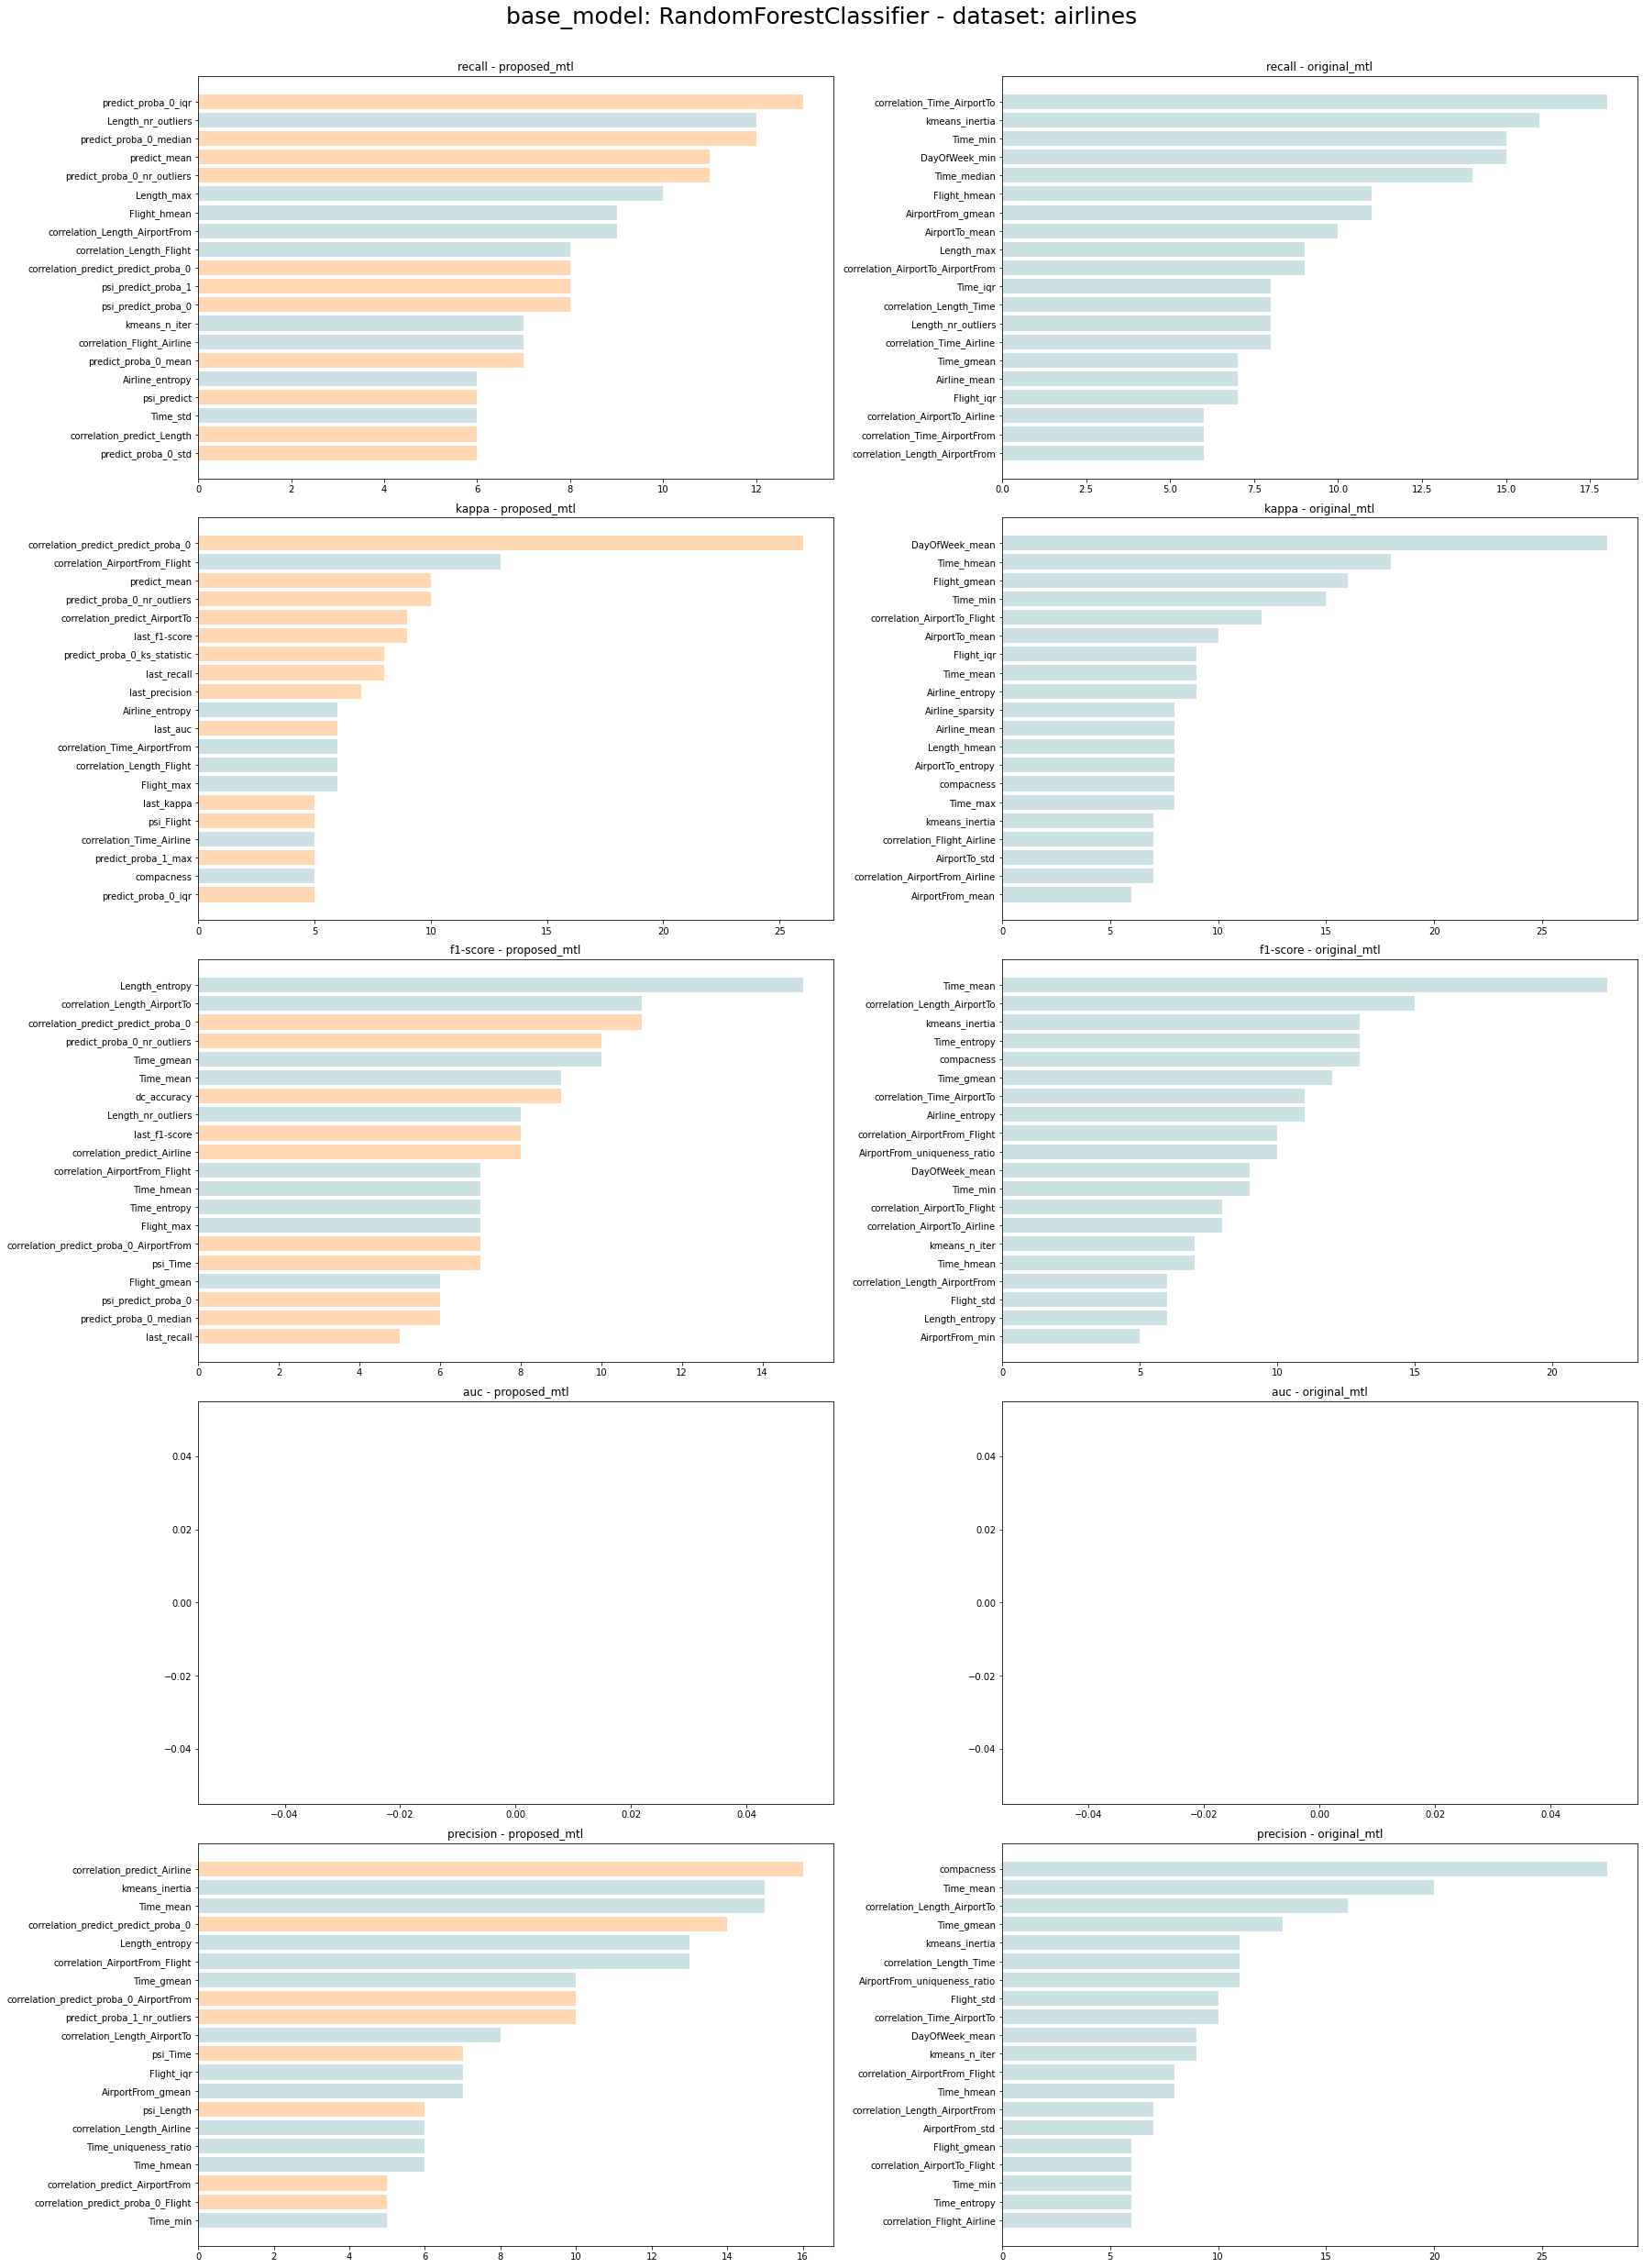

In [55]:
run(base_model="RandomForestClassifier", dataset="airlines", feature_fraction=FINAL_FEATURE_FRACTION["airlines"])

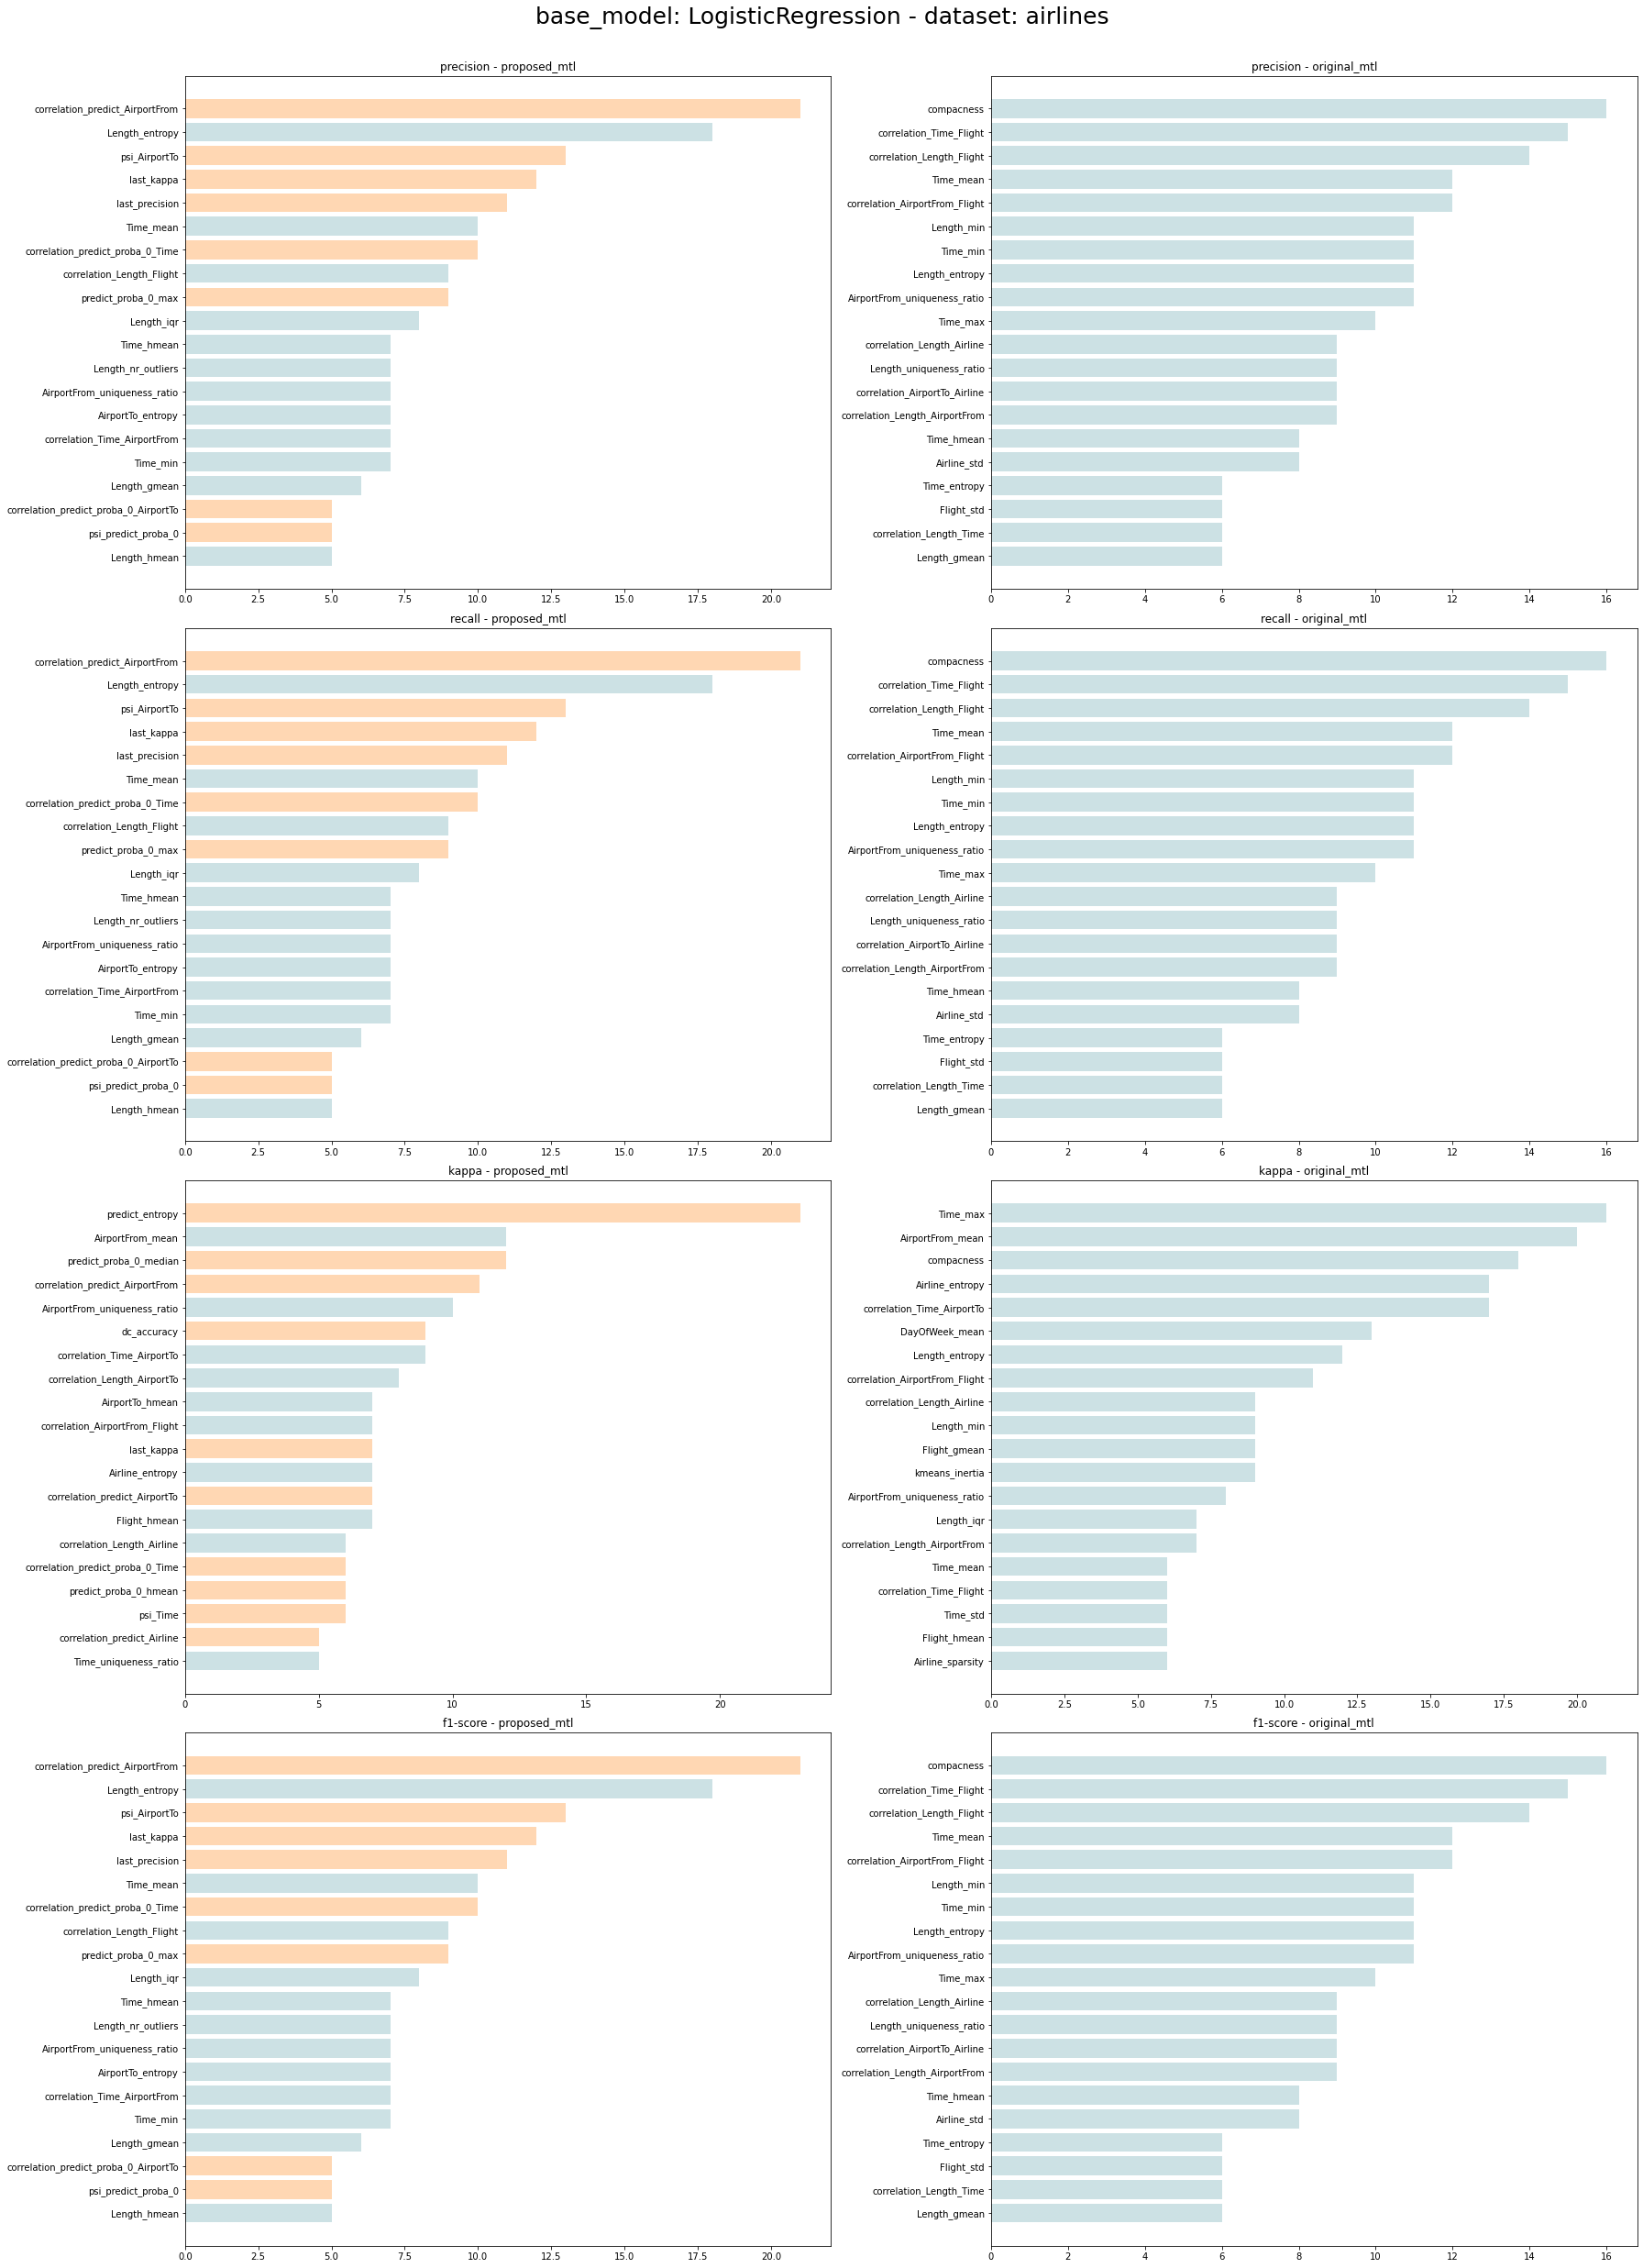

In [56]:
run(base_model="LogisticRegression", dataset="airlines", feature_fraction=FINAL_FEATURE_FRACTION["airlines"])

# powersupply

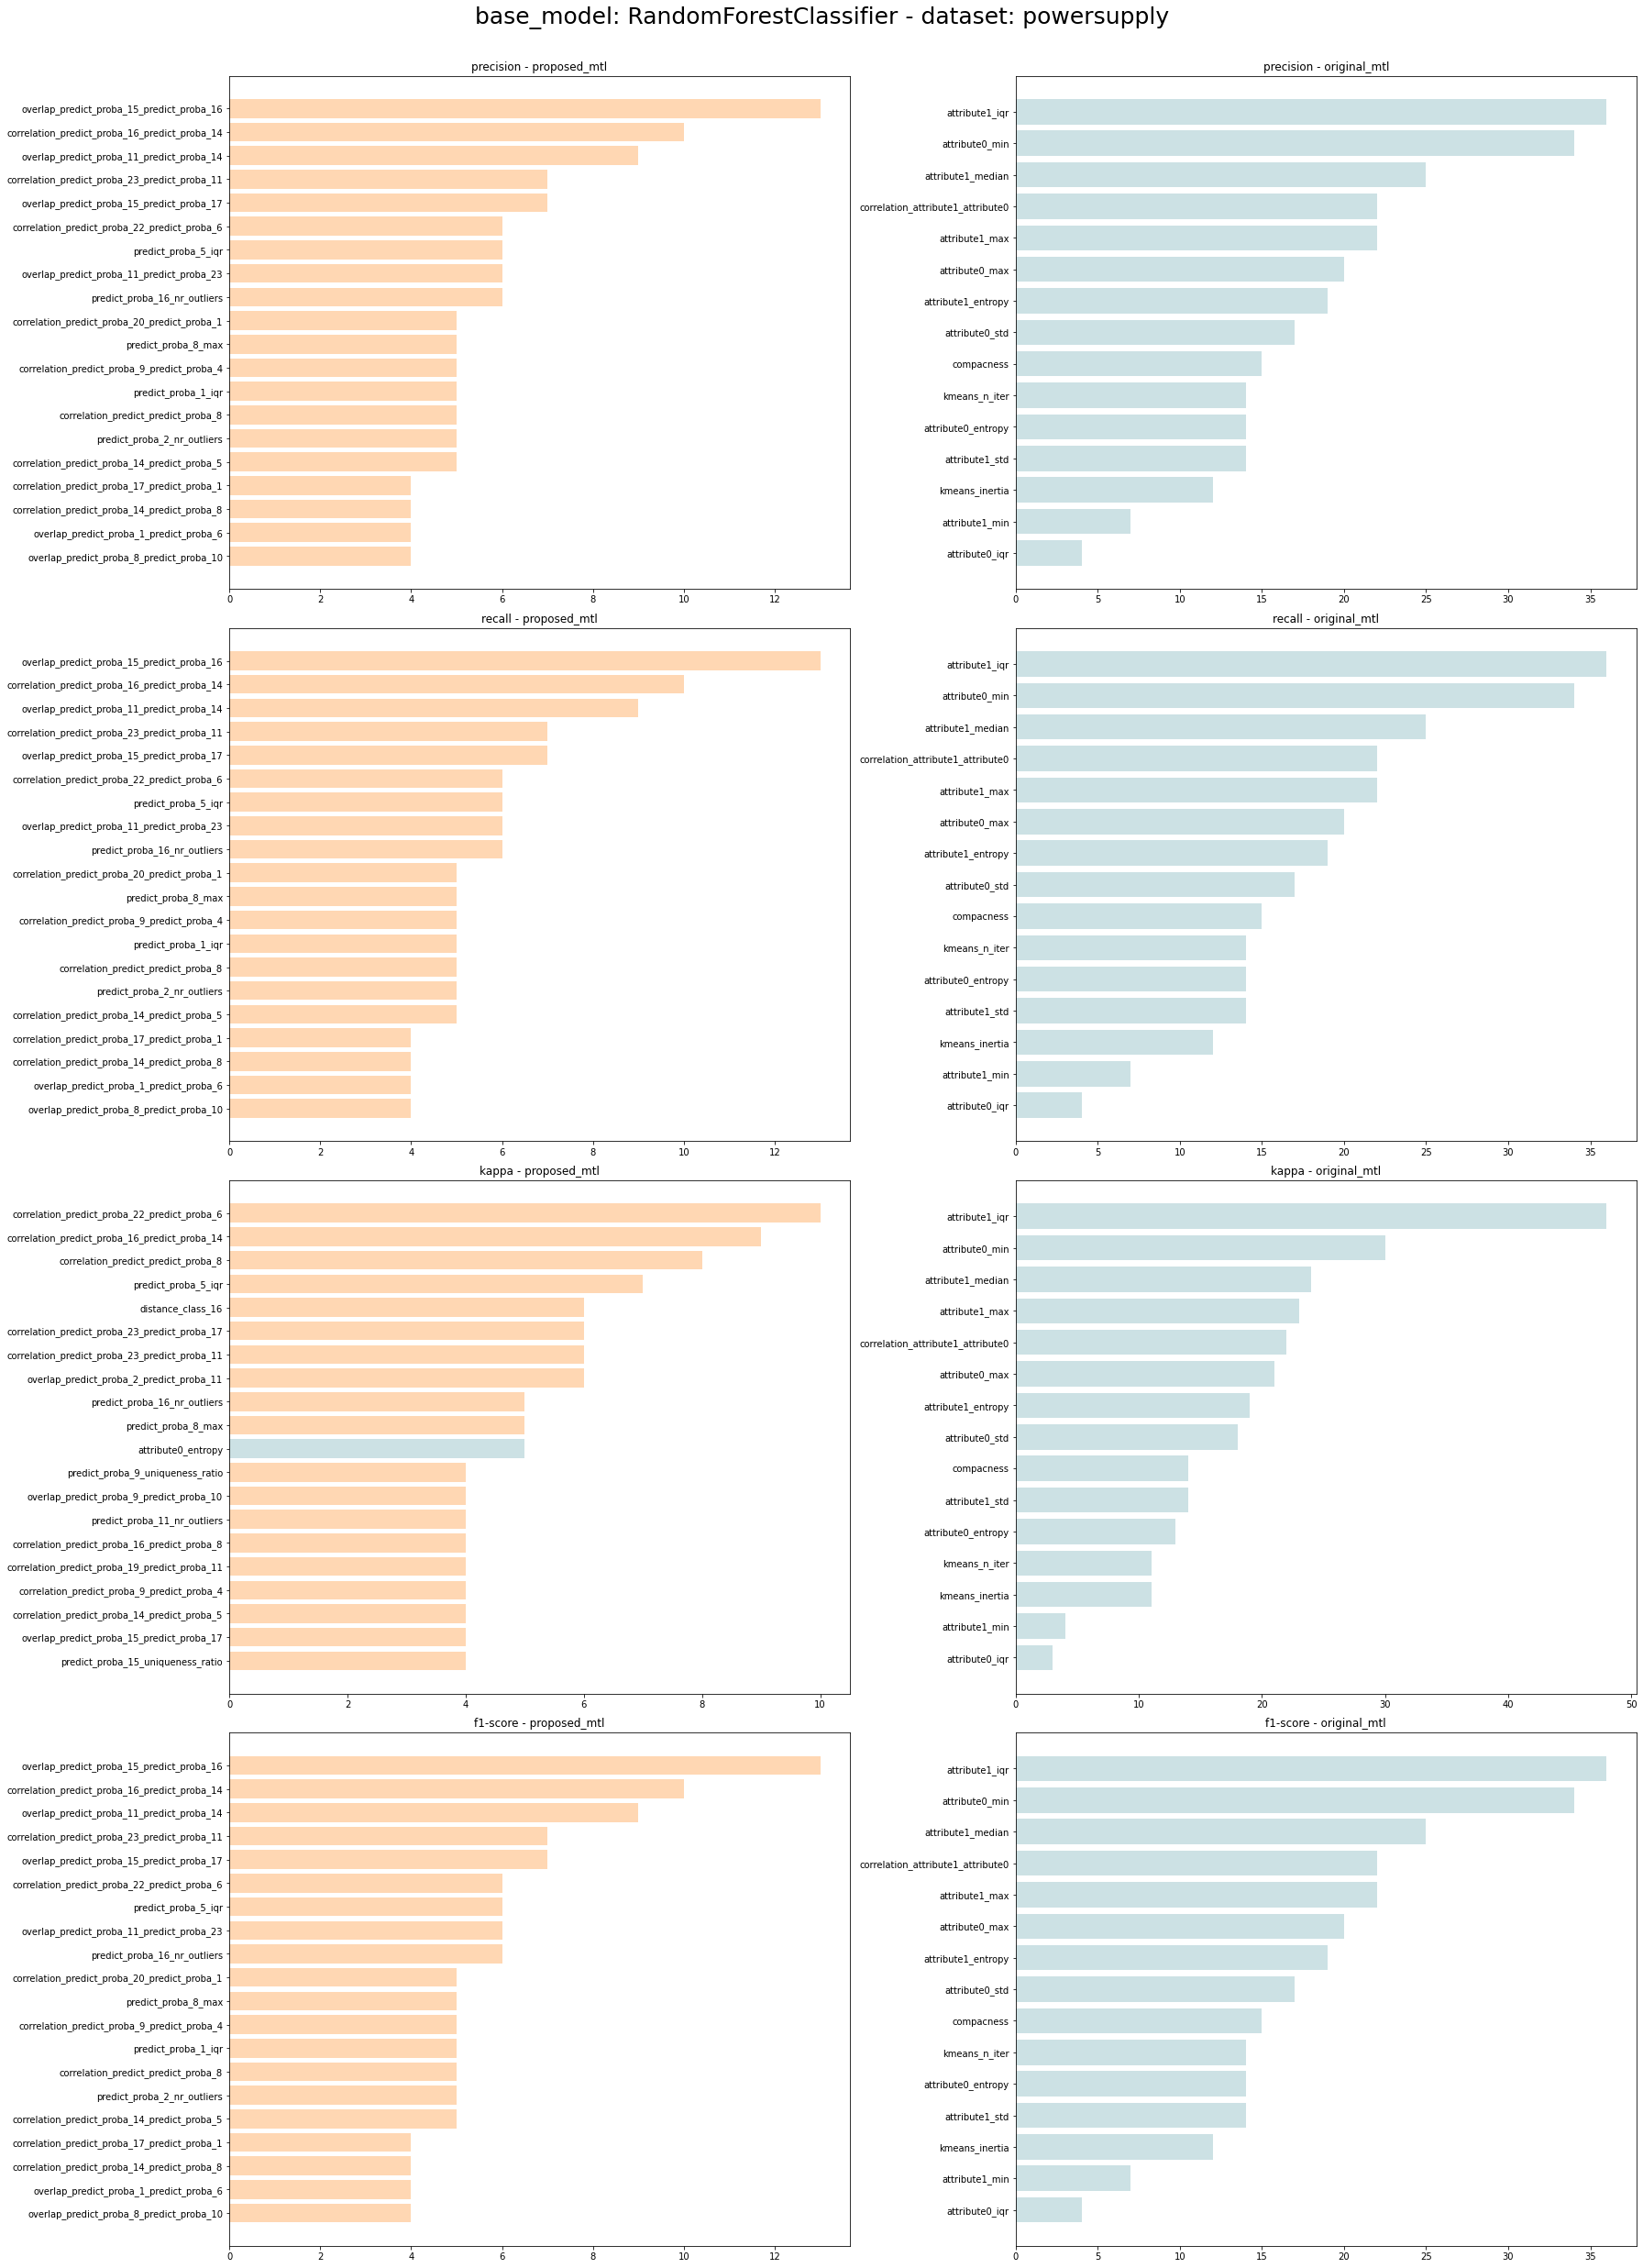

In [57]:
run(base_model="RandomForestClassifier", dataset="powersupply", feature_fraction=FINAL_FEATURE_FRACTION["powersupply"])

# rialto

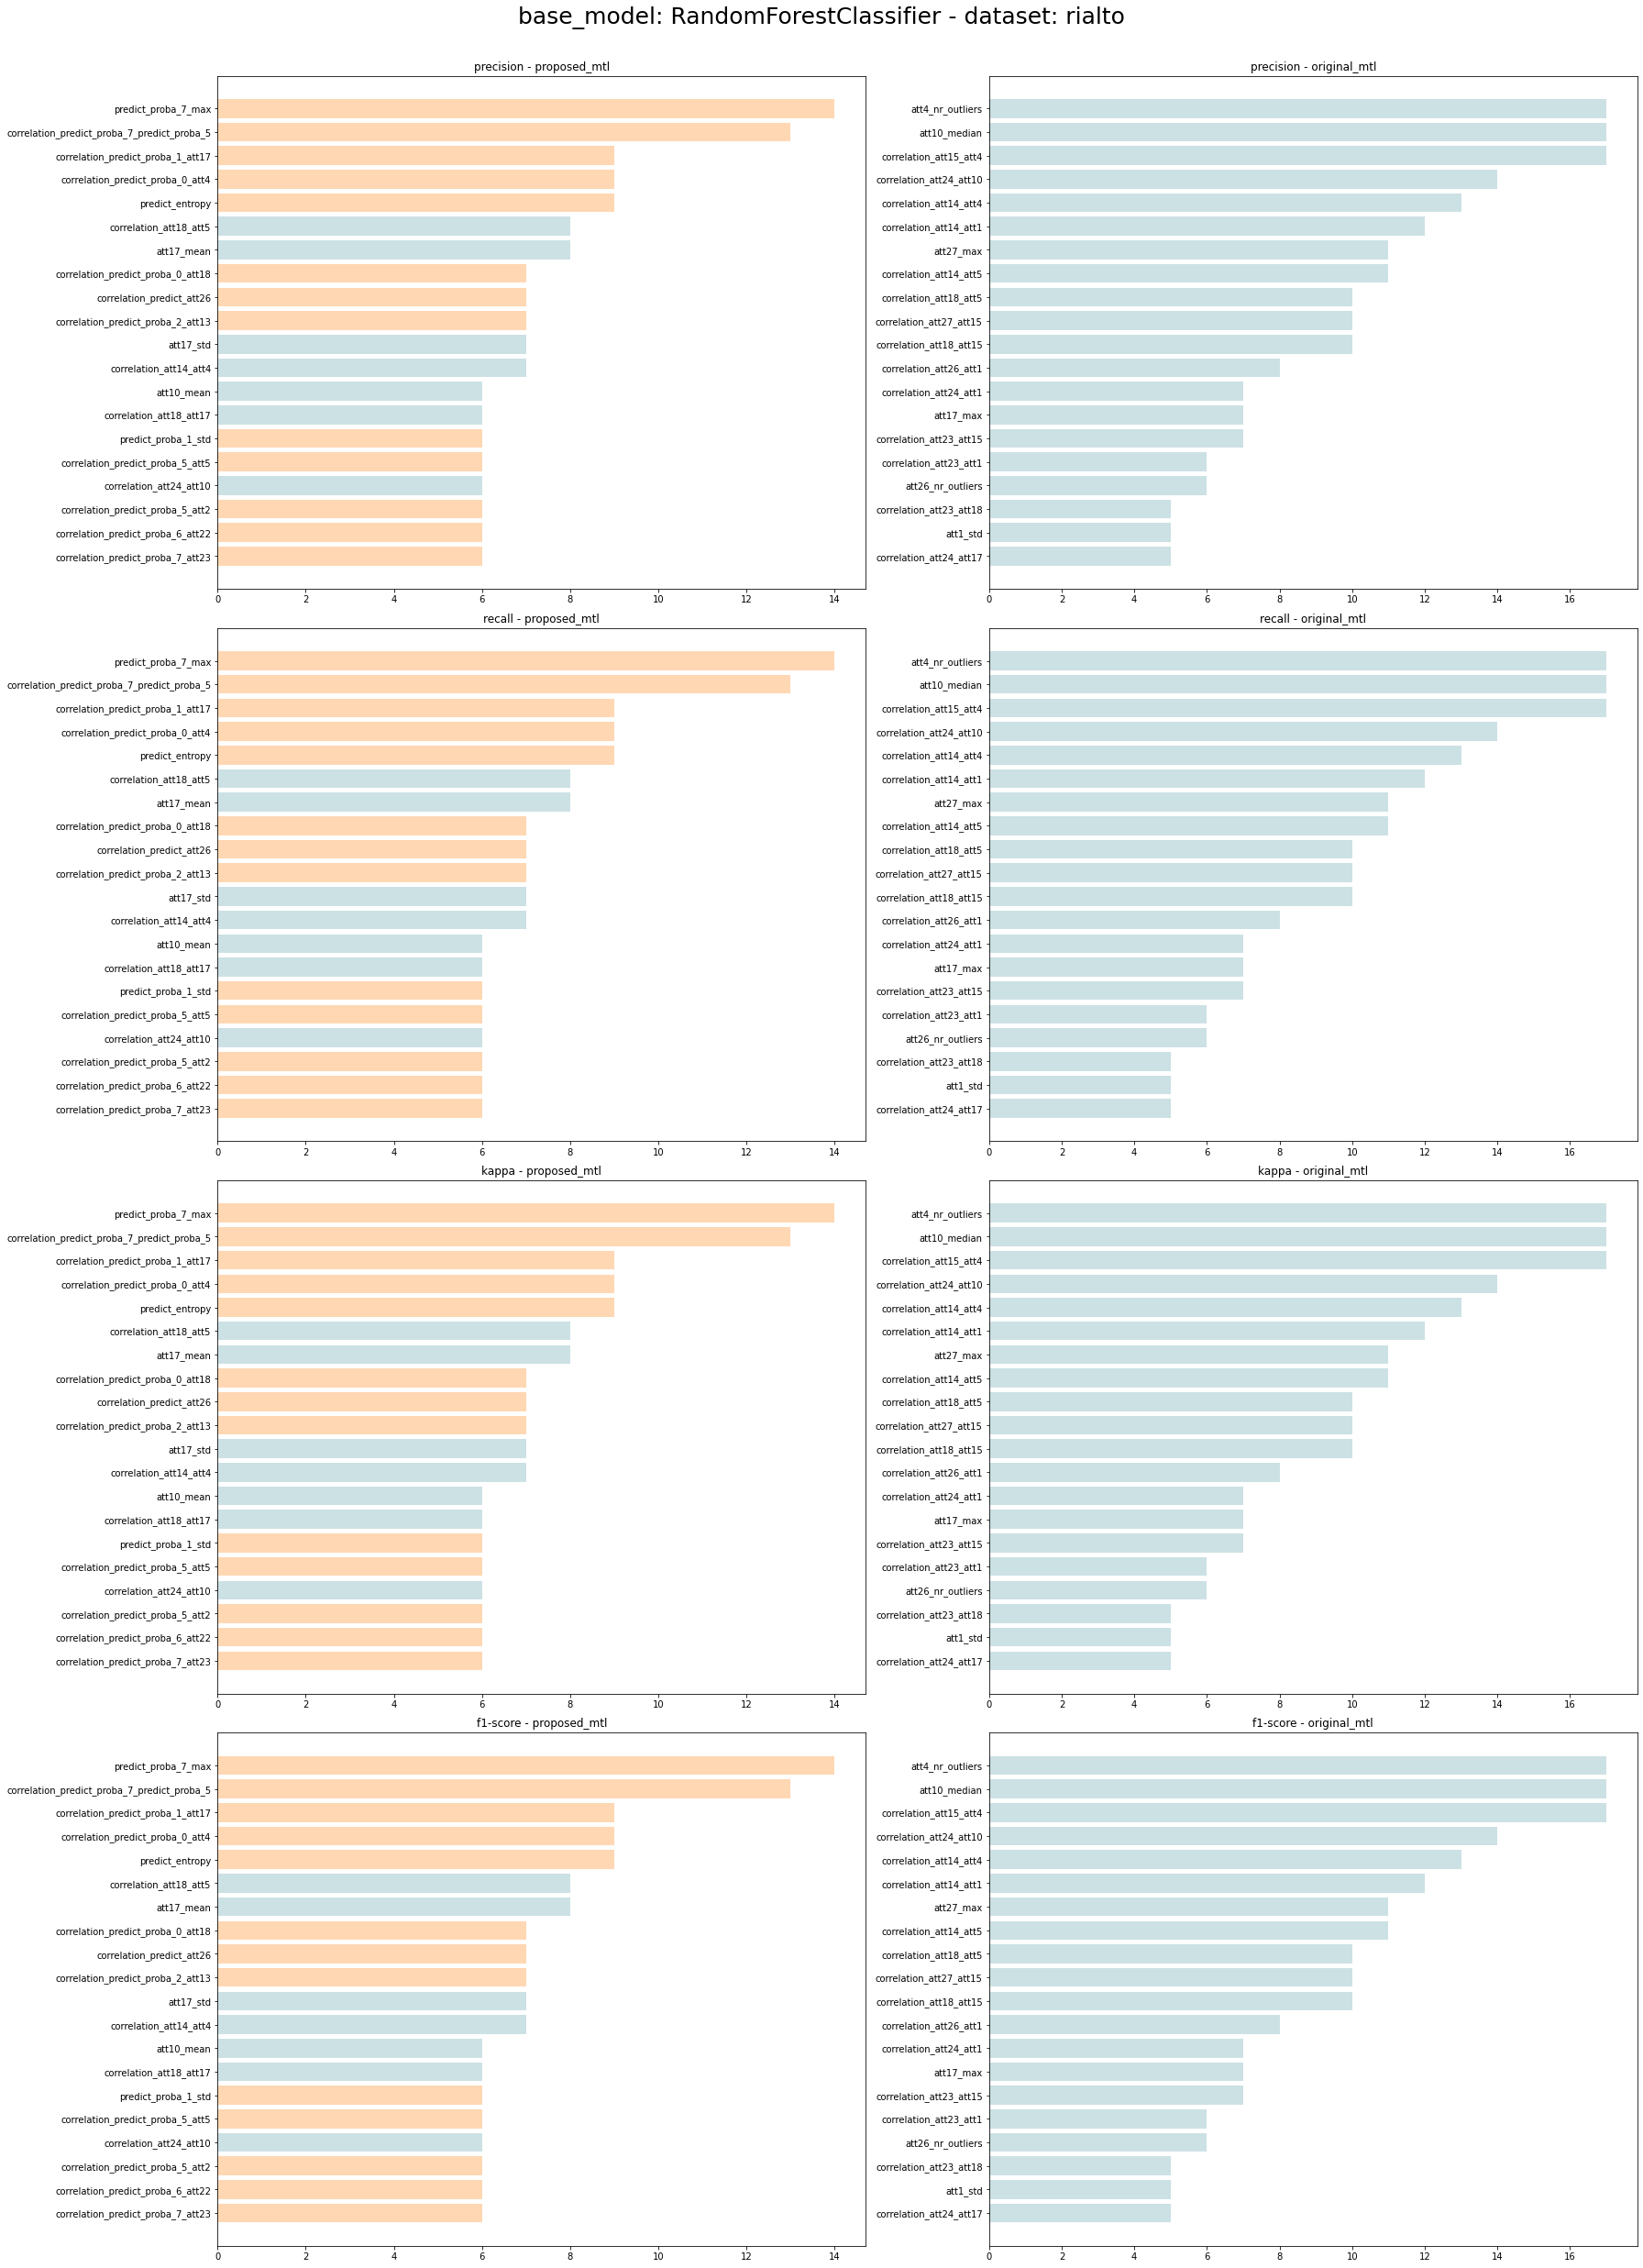

In [58]:
run(base_model="RandomForestClassifier", dataset="rialto", feature_fraction=FINAL_FEATURE_FRACTION["rialto"])